# Regularization with SciKit-Learn

Previously we created a new polynomial feature set and then applied our standard linear regression on it, but we can be smarter about model choice and utilize regularization.

Regularization attempts to minimize the RSS (residual sum of squares) by adding a penalty factor. This penalty factor will penalize models that have coefficients that are too large. Some methods of regularization will actually cause non useful features to have a coefficient of zero, in which case the model does not consider the feature.

Let's explore two methods of regularization, Ridge Regression (L2) and Lasso (L1). We'll combine these with the polynomial feature set (it wouldn't be as effective to perform regularization of a model on such a small original feature set of the original X).

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data and Setup

In [ ]:
df = pd.read_csv(r"I:\Python\Projects\Polynomial Regression & Regularization Methods (Ridge and LASSO)\Advertising.csv")
X = df.drop('sales',axis=1)
y = df['sales']

### Polynomial Conversion

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)

In [7]:
poly_features = polynomial_converter.fit_transform(X)
poly_features

array([[2.30100000e+02, 3.78000000e+01, 6.92000000e+01, ...,
        9.88757280e+04, 1.81010592e+05, 3.31373888e+05],
       [4.45000000e+01, 3.93000000e+01, 4.51000000e+01, ...,
        6.96564990e+04, 7.99365930e+04, 9.17338510e+04],
       [1.72000000e+01, 4.59000000e+01, 6.93000000e+01, ...,
        1.46001933e+05, 2.20434291e+05, 3.32812557e+05],
       ...,
       [1.77000000e+02, 9.30000000e+00, 6.40000000e+00, ...,
        5.53536000e+02, 3.80928000e+02, 2.62144000e+02],
       [2.83600000e+02, 4.20000000e+01, 6.62000000e+01, ...,
        1.16776800e+05, 1.84062480e+05, 2.90117528e+05],
       [2.32100000e+02, 8.60000000e+00, 8.70000000e+00, ...,
        6.43452000e+02, 6.50934000e+02, 6.58503000e+02]])

### Train | Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

----
----

## Scaling the Data

While our particular data set has all the values in the same order of magnitude ($1000s of dollars spent), typically that won't be the case on a dataset, and since the mathematics behind regularized models will sum coefficients together, its important to standardize the features. We only **fit** to the training data, and **transform** on both sets separately.

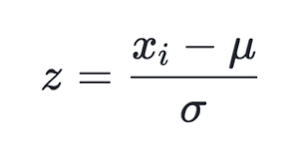

In [9]:
from sklearn.preprocessing import StandardScaler

In [ ]:
help(StandardScaler)

Help on class StandardScaler in module sklearn.preprocessing._data:

class StandardScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  StandardScaler(*, copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance.
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using
 |  :meth:`transform`.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual feat

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(X_train)

StandardScaler()

Here we should only consider **X_train** so that **Data Leakage** doesn't occur from the Test Data. Here, we are only using the statistics of the Train Dataset.

In [12]:
X_train = scaler.transform(X_train)
X_train

array([[ 0.49300171, -0.33994238,  1.61586707, ..., -0.16360242,
         0.54694754,  1.37075536],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.63236858,
         2.6297449 ,  1.95593378],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.72634944,
        -0.61593941, -0.54133745],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.71065643,
        -0.53420112, -0.20690952],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.66805936,
        -0.61031703, -0.54616941],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.61006767,
         0.67881488,  0.45425942]])

In [13]:
X_test = scaler.transform(X_test)

## Ridge Regression
Ridge regression—also known as L2 regularization—is one of several types of regularization for linear regression models. Regularization is a statistical method to reduce errors caused by overfitting on training data. Ridge regression specifically corrects for multicollinearity in regression analysis. This is useful when developing machine learning models that have a large number of parameters, particularly if those parameters also have high weights.

https://www.ibm.com/topics/ridge-regression

In [14]:
from sklearn.linear_model import Ridge

In [15]:
Ridge()

Ridge()

In [16]:
ridge_model = Ridge(alpha=10)

Alpha (α) is the penalty term that denotes the amount of shrinkage (or constraint) that will be implemented in the equation. Our objective here is to find the optimum value of Alpha that reduces the cost function (RSS).

In [17]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [18]:
test_predictions = ridge_model.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [20]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [21]:
MAE

0.5774404204714163

In [22]:
RMSE

0.894638646131965

How did it perform on the training set? (This will be used later on for comparison)

In [23]:
# Training Set Performance
train_predictions = ridge_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.5288348183025309

**### Choosing an alpha value with Cross-Validation**

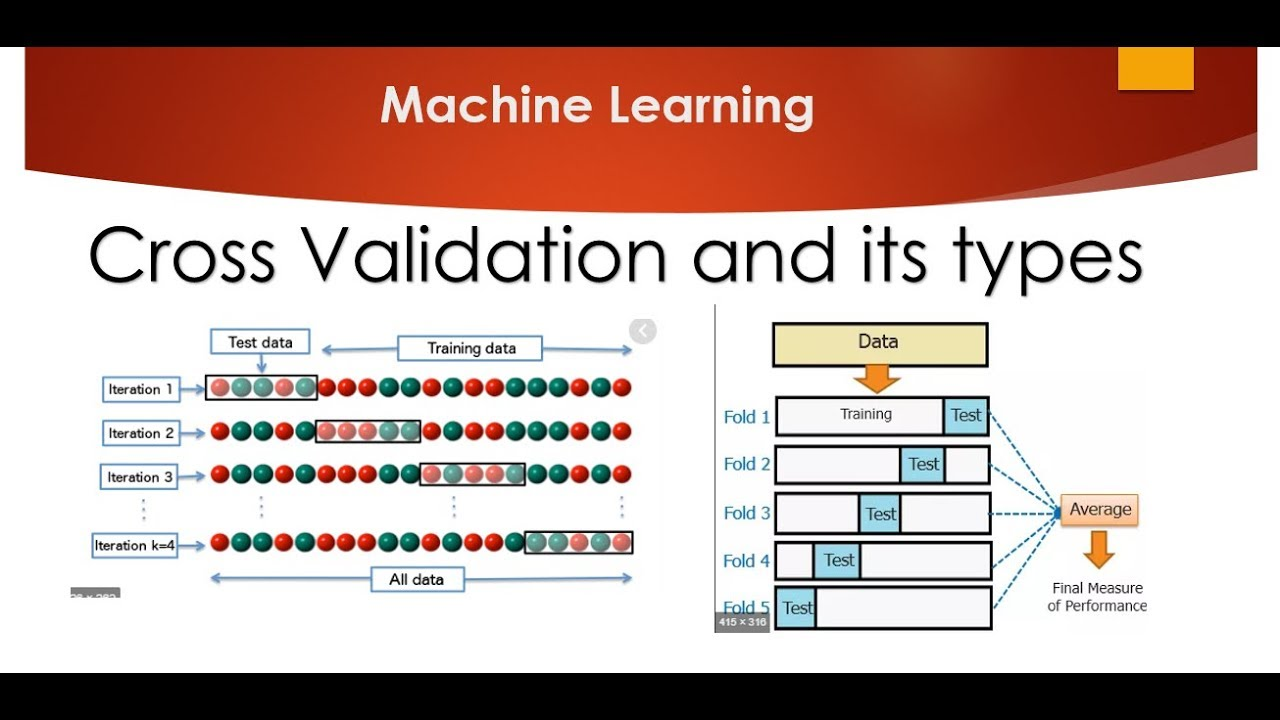

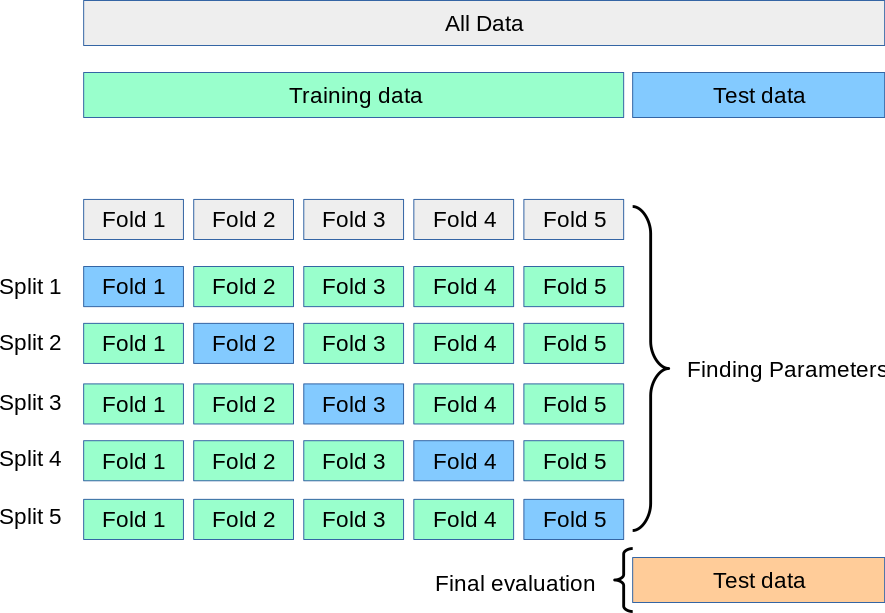

In [24]:
from sklearn.linear_model import RidgeCV

In [ ]:
# help(RidgeCV)

In [25]:
# Choosing a scoring: https://scikit-learn.org/stable/modules/model_evaluation.html
# Negative RMSE so all metrics follow convention "Higher is better"

# See all options: sklearn.metrics.SCORERS.keys()
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In scikit-learn's Ridge regression model, the parameter "alpha" (α) is a hyperparameter that controls the regularization strength applied to the model. Ridge regression is a linear regression technique that incorporates regularization to prevent overfitting by penalizing large coefficients.

The regularization term added to the loss function is proportional to the square of the magnitude of the coefficients, multiplied by the alpha parameter. By increasing the value of alpha, you increase the regularization strength, which can help to reduce overfitting but may also lead to underfitting if set too high.

In practical terms:

A smaller alpha allows the coefficients to be less restricted, potentially leading to a model that captures more of the training data's intricacies but might also be prone to overfitting.
A larger alpha imposes stronger regularization, leading to simpler models with coefficients closer to zero, which can help prevent overfitting but might also lead to less flexibility in capturing the training data's nuances.
Choosing the appropriate value for alpha often involves experimentation and cross-validation to find the best balance between bias and variance in the model.

In [26]:
# The more alpha options you pass, the longer this will take.
# Fortunately our data set is still pretty small
ridge_cv_model.fit(X_train,y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [27]:
ridge_cv_model.alpha_

0.1

In [28]:
test_predictions = ridge_cv_model.predict(X_test)

In [29]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [30]:
MAE

0.427377488434534

In [31]:
RMSE

0.6180719926938822

In [32]:
# Training Set Performance
# Training Set Performance
train_predictions = ridge_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.30941321056539456

In [33]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])


-----

## Lasso Regression (L1 Regularization)

LASSO regression, also known as L1 regularization, is a popular technique used in statistical modeling and machine learning to estimate the relationships between variables and make predictions. LASSO stands for Least Absolute Shrinkage and Selection Operator.

The primary goal of LASSO regression is to find a balance between model simplicity and accuracy. It achieves this by adding a penalty term to the traditional linear regression model, which encourages sparse solutions where some coefficients are forced to be exactly zero. This feature makes LASSO particularly useful for feature selection, as it can automatically identify and discard irrelevant or redundant variables.

https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/

In [34]:
from sklearn.linear_model import LassoCV

In [35]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

The **eps** parameter in LassoCV refers to the tolerance for the optimization algorithm to determine the convergence of the solution.

More specifically, eps determines the threshold for the change in the coefficients of the Lasso regression model between iterations. If the change in coefficients falls below this threshold, the algorithm stops iterating, assuming convergence has been achieved.

In practical terms, you can think of eps as controlling the precision of the optimization process. A smaller eps value leads to a more precise solution but may require more iterations, potentially increasing computational time. On the other hand, a larger eps value may converge faster but may sacrifice some precision in the final solution.

When using LassoCV, you can adjust the eps parameter to balance between computational efficiency and solution precision, depending on the specific requirements of your problem and available computational resources.

In [36]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [37]:
lasso_cv_model.alpha_

0.4943070909225831

In [38]:
test_predictions = lasso_cv_model.predict(X_test)

In [39]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [40]:
MAE

0.6541723161252868

In [41]:
RMSE

1.1308001022762548

In [42]:
# Training Set Performance
# Training Set Performance
train_predictions = lasso_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.691280714082071

In [43]:
lasso_cv_model.coef_

array([1.002651  , 0.        , 0.        , 0.        , 3.79745279,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

## Elastic Net

Elastic Net combines the penalties of ridge regression and lasso in an attempt to get the best of both worlds!

In [44]:
from sklearn.linear_model import ElasticNetCV

In [45]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)

In ElasticNetCV, l1_ratio and tol are both parameters that influence the behavior of the Elastic Net model during cross-validation.

**l1_ratio:** This parameter determines the mixing parameter between L1 and L2 penalties in the Elastic Net regularization. It ranges from 0 to 1, where:
l1_ratio = 0 corresponds to Ridge regression (L2 penalty only).
l1_ratio = 1 corresponds to Lasso regression (L1 penalty only).
Intermediate values of l1_ratio represent a combination of L1 and L2 penalties, hence the name "Elastic Net". For example, l1_ratio = 0.5 means a 50-50 mix of L1 and L2 penalties.

Choosing the appropriate value for l1_ratio depends on the specific characteristics of your data and the desired properties of the resulting model. If you're unsure, cross-validation can help determine the best value.

**tol:** This parameter sets the tolerance for the optimization algorithm used in Elastic Net. It represents the stopping criterion; if the optimization algorithm's improvement is less than this value during iterations, the algorithm stops.Setting tol to a smaller value leads to more precise optimization but may require more computational resources and time. Conversely, setting it to a larger value can speed up the optimization process but may result in slightly less accurate results.

In ElasticNetCV, these parameters are typically specified alongside other parameters like alphas, which control the strength of regularization, and cv, which determines the cross-validation strategy. The ElasticNetCV class in scikit-learn automates the process of tuning these hyperparameters using cross-validation, finding the optimal values that minimize prediction error.

In [46]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [47]:
elastic_model.l1_ratio_

1.0

In [48]:
test_predictions = elastic_model.predict(X_test)

In [49]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [50]:
MAE

0.566326211756945

In [51]:
RMSE

0.7485546215633726

In [52]:
# Training Set Performance
# Training Set Performance
train_predictions = elastic_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.4307582990472368

In [53]:
elastic_model.coef_

array([ 3.78993643,  0.89232919,  0.28765395, -1.01843566,  2.15516144,
       -0.3567547 , -0.271502  ,  0.09741081,  0.        , -1.05563151,
        0.2362506 ,  0.07980911,  1.26170778,  0.01464706,  0.00462336,
       -0.39986069,  0.        ,  0.        , -0.05343757])

-----
---